In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.densenet import DenseNet169
from keras.applications.densenet import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras import optimizers
import tensorflow as tf
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from datetime import datetime
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
from tqdm import tqdm

In [103]:
IMAGE_SIZE = [224, 224]
# batch_size = 32
batch_size = 32
numOfEpochs = 100
optimizer = tf.keras.optimizers.Adam()
# optimizer = tf.keras.optimizers.Adam(learning_rate=0.07)
# optimizer = tf.keras.optimizers.RMSprop()

In [104]:
#Give dataset path
# train_path = r'C:\Users\Ezazr\Desktop\UNet-TF-new\Classification-Dataset - Augmented\train'
# test_path = r'C:\Users\Ezazr\Desktop\UNet-TF-new\Classification-Dataset - Augmented\test'
# validation_path = r'C:\Users\Ezazr\Desktop\UNet-TF-new\Classification-Dataset - Augmented\validation'
train_path = r'C:\Users\Ezazr\Desktop\UNet-TF-new\Classification-Dataset - Cross Validation 4 fold\Fold 4\train'
test_path = r'C:\Users\Ezazr\Desktop\UNet-TF-new\Classification-Dataset - Cross Validation 4 fold\Fold 4\test'
validation_path = r'C:\Users\Ezazr\Desktop\UNet-TF-new\Classification-Dataset - Cross Validation 4 fold\Fold 4\validation'

In [105]:
inception = DenseNet169(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [106]:
inception.input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_4')>

In [107]:
for layer in inception.layers:
  layer.trainable = False

In [108]:
folders = glob(train_path + '/*')
print(len(folders))

2


In [109]:
x = Flatten()(inception.output)
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=inception.input, outputs=prediction)
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_282 (Conv2D)            (None, 111, 111, 32  864         ['input_4[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_282 (Batch  (None, 111, 111, 32  96         ['conv2d_282[0][0]']             
 Normalization)                 )                                                           

 conv2d_293 (Conv2D)            (None, 25, 25, 32)   6144        ['average_pooling2d_27[0][0]']   
                                                                                                  
 batch_normalization_287 (Batch  (None, 25, 25, 64)  192         ['conv2d_287[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_289 (Batch  (None, 25, 25, 64)  192         ['conv2d_289[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_292 (Batch  (None, 25, 25, 96)  288         ['conv2d_292[0][0]']             
 Normalization)                                                                                   
          

                                                                                                  
 conv2d_304 (Conv2D)            (None, 25, 25, 64)   18432       ['mixed1[0][0]']                 
                                                                                                  
 batch_normalization_304 (Batch  (None, 25, 25, 64)  192         ['conv2d_304[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_304 (Activation)    (None, 25, 25, 64)   0           ['batch_normalization_304[0][0]']
                                                                                                  
 conv2d_302 (Conv2D)            (None, 25, 25, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_30

                                                                                                  
 activation_311 (Activation)    (None, 12, 12, 96)   0           ['batch_normalization_311[0][0]']
                                                                                                  
 max_pooling2d_14 (MaxPooling2D  (None, 12, 12, 288)  0          ['mixed2[0][0]']                 
 )                                                                                                
                                                                                                  
 mixed3 (Concatenate)           (None, 12, 12, 768)  0           ['activation_308[0][0]',         
                                                                  'activation_311[0][0]',         
                                                                  'max_pooling2d_14[0][0]']       
                                                                                                  
 conv2d_31

 mixed4 (Concatenate)           (None, 12, 12, 768)  0           ['activation_312[0][0]',         
                                                                  'activation_315[0][0]',         
                                                                  'activation_320[0][0]',         
                                                                  'activation_321[0][0]']         
                                                                                                  
 conv2d_326 (Conv2D)            (None, 12, 12, 160)  122880      ['mixed4[0][0]']                 
                                                                                                  
 batch_normalization_326 (Batch  (None, 12, 12, 160)  480        ['conv2d_326[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activatio

 conv2d_336 (Conv2D)            (None, 12, 12, 160)  122880      ['mixed5[0][0]']                 
                                                                                                  
 batch_normalization_336 (Batch  (None, 12, 12, 160)  480        ['conv2d_336[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_336 (Activation)    (None, 12, 12, 160)  0           ['batch_normalization_336[0][0]']
                                                                                                  
 conv2d_337 (Conv2D)            (None, 12, 12, 160)  179200      ['activation_336[0][0]']         
                                                                                                  
 batch_normalization_337 (Batch  (None, 12, 12, 160)  480        ['conv2d_337[0][0]']             
 Normaliza

 activation_346 (Activation)    (None, 12, 12, 192)  0           ['batch_normalization_346[0][0]']
                                                                                                  
 conv2d_347 (Conv2D)            (None, 12, 12, 192)  258048      ['activation_346[0][0]']         
                                                                                                  
 batch_normalization_347 (Batch  (None, 12, 12, 192)  576        ['conv2d_347[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_347 (Activation)    (None, 12, 12, 192)  0           ['batch_normalization_347[0][0]']
                                                                                                  
 conv2d_343 (Conv2D)            (None, 12, 12, 192)  147456      ['mixed6[0][0]']                 
          

 Normalization)                                                                                   
                                                                                                  
 activation_355 (Activation)    (None, 12, 12, 192)  0           ['batch_normalization_355[0][0]']
                                                                                                  
 conv2d_352 (Conv2D)            (None, 12, 12, 192)  147456      ['mixed7[0][0]']                 
                                                                                                  
 conv2d_356 (Conv2D)            (None, 12, 12, 192)  258048      ['activation_355[0][0]']         
                                                                                                  
 batch_normalization_352 (Batch  (None, 12, 12, 192)  576        ['conv2d_352[0][0]']             
 Normalization)                                                                                   
          

 Normalization)                                                                                   
                                                                                                  
 conv2d_366 (Conv2D)            (None, 5, 5, 192)    245760      ['average_pooling2d_34[0][0]']   
                                                                                                  
 batch_normalization_358 (Batch  (None, 5, 5, 320)   960         ['conv2d_358[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_360 (Activation)    (None, 5, 5, 384)    0           ['batch_normalization_360[0][0]']
                                                                                                  
 activation_361 (Activation)    (None, 5, 5, 384)    0           ['batch_normalization_361[0][0]']
          

                                                                                                  
 activation_369 (Activation)    (None, 5, 5, 384)    0           ['batch_normalization_369[0][0]']
                                                                                                  
 activation_370 (Activation)    (None, 5, 5, 384)    0           ['batch_normalization_370[0][0]']
                                                                                                  
 activation_373 (Activation)    (None, 5, 5, 384)    0           ['batch_normalization_373[0][0]']
                                                                                                  
 activation_374 (Activation)    (None, 5, 5, 384)    0           ['batch_normalization_374[0][0]']
                                                                                                  
 batch_normalization_375 (Batch  (None, 5, 5, 192)   576         ['conv2d_375[0][0]']             
 Normaliza

In [110]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [111]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [112]:
validation_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [113]:
test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [114]:
train_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = batch_size,
                                                 class_mode = 'categorical')

Found 714 images belonging to 2 classes.


In [115]:
validation_set = validation_datagen.flow_from_directory(validation_path,
                                                 target_size = (224, 224),
                                                 batch_size = batch_size,
                                                 class_mode = 'categorical')

Found 88 images belonging to 2 classes.


In [116]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = batch_size,
                                            class_mode = 'categorical',
                                            shuffle=False)

Found 107 images belonging to 2 classes.


In [117]:

es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5,  restore_best_weights=True)


model_history=model.fit(
  train_set,
  validation_data=validation_set,
  epochs=numOfEpochs,
  steps_per_epoch=5,
#   validation_steps=32,
  batch_size=batch_size,
#   callbacks=[es],
  verbose=2)



Epoch 1/100
5/5 - 52s - loss: 4.0223 - accuracy: 0.4710 - val_loss: 2.7218 - val_accuracy: 0.4886 - 52s/epoch - 10s/step
Epoch 2/100
5/5 - 24s - loss: 1.8722 - accuracy: 0.6438 - val_loss: 0.8671 - val_accuracy: 0.8523 - 24s/epoch - 5s/step
Epoch 3/100
5/5 - 21s - loss: 1.4307 - accuracy: 0.7000 - val_loss: 0.6106 - val_accuracy: 0.8636 - 21s/epoch - 4s/step
Epoch 4/100
5/5 - 23s - loss: 0.8050 - accuracy: 0.8188 - val_loss: 1.0224 - val_accuracy: 0.8295 - 23s/epoch - 5s/step
Epoch 5/100
5/5 - 24s - loss: 0.8828 - accuracy: 0.8375 - val_loss: 0.7077 - val_accuracy: 0.8864 - 24s/epoch - 5s/step
Epoch 6/100
5/5 - 24s - loss: 1.0972 - accuracy: 0.8062 - val_loss: 0.5052 - val_accuracy: 0.8750 - 24s/epoch - 5s/step
Epoch 7/100
5/5 - 22s - loss: 0.8143 - accuracy: 0.8261 - val_loss: 0.5157 - val_accuracy: 0.8295 - 22s/epoch - 4s/step
Epoch 8/100
5/5 - 21s - loss: 0.7286 - accuracy: 0.8261 - val_loss: 0.5938 - val_accuracy: 0.8636 - 21s/epoch - 4s/step
Epoch 9/100
5/5 - 22s - loss: 0.6604 - 

Epoch 69/100
5/5 - 24s - loss: 0.3461 - accuracy: 0.9312 - val_loss: 0.5685 - val_accuracy: 0.8977 - 24s/epoch - 5s/step
Epoch 70/100
5/5 - 24s - loss: 0.3756 - accuracy: 0.8875 - val_loss: 0.0611 - val_accuracy: 0.9773 - 24s/epoch - 5s/step
Epoch 71/100
5/5 - 24s - loss: 0.3372 - accuracy: 0.9250 - val_loss: 0.2811 - val_accuracy: 0.9432 - 24s/epoch - 5s/step
Epoch 72/100
5/5 - 25s - loss: 0.2370 - accuracy: 0.9000 - val_loss: 0.4651 - val_accuracy: 0.8977 - 25s/epoch - 5s/step
Epoch 73/100
5/5 - 24s - loss: 0.2952 - accuracy: 0.9250 - val_loss: 0.4412 - val_accuracy: 0.8864 - 24s/epoch - 5s/step
Epoch 74/100
5/5 - 24s - loss: 0.2038 - accuracy: 0.9250 - val_loss: 0.1995 - val_accuracy: 0.9545 - 24s/epoch - 5s/step
Epoch 75/100
5/5 - 22s - loss: 0.4926 - accuracy: 0.8687 - val_loss: 0.3707 - val_accuracy: 0.9318 - 22s/epoch - 4s/step
Epoch 76/100
5/5 - 24s - loss: 0.4562 - accuracy: 0.9000 - val_loss: 0.5043 - val_accuracy: 0.8750 - 24s/epoch - 5s/step
Epoch 77/100
5/5 - 24s - loss: 0

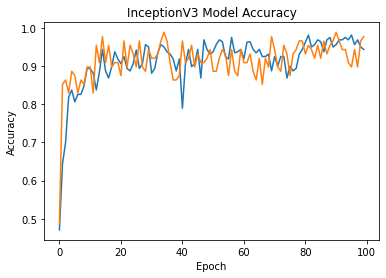

In [118]:
_# Plot training & validation loss values
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
# plt.plot(model_history.history['loss'])
plt.title('DenseNet169 Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
# plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()


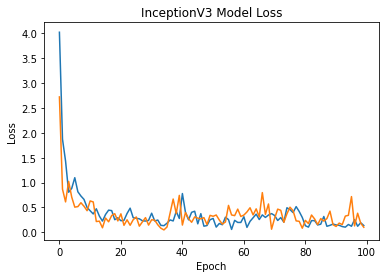

In [119]:
_# Plot training & validation loss values
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('DenseNet169 Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
# plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

In [120]:
result = model.evaluate(test_set)
print("test_loss, test accuracy",result)

4/4 [==============================] - 10s 2s/step - loss: 0.2504 - accuracy: 0.9533
test_loss, test accuracy [0.25039878487586975, 0.9532710313796997]


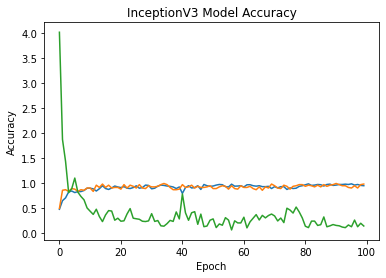

In [121]:
_# Plot training & validation loss values
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.plot(model_history.history['loss'])
plt.title('DenseNet169 Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
# plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()


In [122]:
# epochs = list(range(0,numOfEpochs))
# plt.plot(model_history.history['accuracy'])
# plt.plot(epochs)
# plt.title('CNN Model accuracy values')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Test'], loc='upper left')
# plt.show()

In [123]:
# epochs = list(range(0,numOfEpochs))
# plt.plot(model_history.history['loss'])
# plt.plot(epochs)
# plt.title('CNN Model loss values')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Test'], loc='upper left')
# plt.show()

In [124]:
resss = model.predict(test_set)
print(np.array(tf.argmax(resss, axis=1)))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [125]:
from sklearn.metrics import roc_curve, auc
import glob
import os

Aedes_Count = 0;
test_labels = []
#for directory_path in glob.glob("cell_images/test/*"): 
for directory_path in glob.glob(test_path + "/*"):
    label = directory_path.split("\\")[-1]
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        if(label == 'Aedes'):
            Aedes_Count = Aedes_Count + 1;
            test_labels.append(0)
        else:
            test_labels.append(1)
        
test_labels = np.array(test_labels)

In [126]:
def get_datalevel2():
    datalevel= []
    for i in range(len(test_labels)):
        if(i < Aedes_Count):
            datalevel.append([1,0])
        else:
            datalevel.append([0,1])
    return np.array(datalevel)


In [127]:
testdataLevels = get_datalevel2()
# print(testdataLevels)
y_score = model.predict(test_set)
# preds = y_score[:,1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(testdataLevels[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

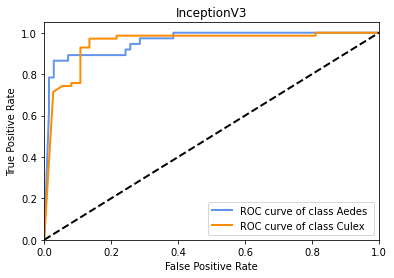

In [128]:
colors = ["cornflowerblue", "darkorange"]
classes = ['Aedes','Culex']

plt.figure()
lw = 2
for i in range(2):
    plt.plot(
        fpr[i],
        tpr[i],
        color=colors[i],
        lw=lw,
        label="ROC curve of class {0} ".format(classes[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("DenseNet169")
plt.legend(loc="lower right")
plt.show()

In [129]:
roc_auc

{0: 0.9573359073359075, 1: 0.949034749034749}

In [130]:
from sklearn import metrics

test_labels_predict = [];
for i in range(len(y_score)):
    if(y_score[i][0] > y_score[i][1]):
        test_labels_predict.append(0)
    else:
        test_labels_predict.append(1)
        
test_labels_predict = np.array(test_labels_predict)

# confusion_matrix
confusion = metrics.confusion_matrix(test_labels, test_labels_predict)
print(confusion)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
SPC = TN / float(TN+FP)
TPR = TP / float(TP+FN)
print('\nSPC = ', SPC, '\nTPR = ', TPR)

[[33  4]
 [ 5 65]]

SPC =  0.8918918918918919 
TPR =  0.9285714285714286
